# **Sentiment Analysis of Mobile Money Service M-PESA Using Twitter Data.**

# **1) Project Overview**

M-Pesa is a mobile money service that was first launched in Kenya in 2007. It allows users to store and transfer money, pay bills, and purchase goods and services using their mobile phones. M-Pesa is a popular alternative to traditional banking in many African countries, where a large proportion of the population is unbanked. The service has expanded to other countries in Africa, Asia, and Europe, and has become a model for other mobile money services around the world. M-Pesa has been credited with revolutionizing mobile banking and transforming the way people in developing countries access financial services.Mobile money service M-pesa is the most popular in Kenya, providing financial services to millions of people who previously lacked access to traditional banking services. However, despite the widespread adoption of M-pesa, the sentiment of the M-pesa users is not well understood especially online on twitter. This project aims to fill this gap by analyzing and accurately predicting a tweet's sentiment about M-pesa in Kenya as it is important to understand the sentiment of tweets to gauge public opinion and potentially make improvements.Sentiment analysis is a process of determining the sentiment or emotion expressed in a piece of text.The sentiments are;
* Positive (2)
* Negative (1)
* Neutral (0)



## **1.1) Problem Statement**

Despite the widespread adoption of M-pesa, the sentiment of the M-pesa users is not well understood especially online on twitter. Our project's aim is to perform sentiment analysis on tweets related to mobile money service m-pesa and predict a tweet's sentiment accurately in order to understand the public opinion towards the services.

## **1.2) Defining the Question**

###  **Specifying the Question**

What is the sentiment expressed in tweets related to m-pesa and can we predict a tweet's sentiment accurately?

 ## **1.3) Metrics of Success:**

The sentiment analysis will be considered successful when we are able to accurately classify and predict  the sentiment expressed in tweets related to mobile money service m-pesa, with a focus on high accuracy, precision and recall.

## **1.4) Research Objectives**

**Main Objective**

To understand customers' satisfaction with Mpesa products and services and gauge whether a tweet's sentiment is neutral, positive or negative in order to improve the quality of service

**Specific Objectives**
*   To gauge public opinion on M-pesa so as to assess m-pesa brand reputation.
*   To identify potential causes for positive or negative sentiment towards M-pesa.
*   To identify the most common topics and hashtags related to M-pesa.
*   To identify the most common sentiment related to m-pesa.
*   To predict a tweet's sentiment on m-pesa accurately.

## **1.5 Recording the Experimental Design**
1. Defining the research question.
2. Scraping, loading the data and previewing preliminary characteristics of the dataset.
3. Data cleaning and preprocessing with EDA.
4. Converting the tokenized tweets into numerical data.
5. Splitting the data into training and testing sets.
6. Fitting a machine learning model to the training data.
7. Evaluating the model's performance on the testing data.
8. Deployment.
9. Conclusion.
10. Recommendations.

## **1.6) Relevance of the data**
The sentiment expressed in tweets related to mobile money service M-pesa is relevant in understanding the public opinion towards the service. This information can be useful for the service provider in improving their service, addressing any negative sentiment expressed by users and  to research real customer needs and assess brand reputation. Sentiment analysis is leveraged to identify the polarity of information (positive vs. negative), emotion (anger, happiness, sadness, etc.), and intention (e.g., interested and not interested).The tweets data was scraped from twitter between the dates of "2018-01-01" and "2023-02-09".

# **2) Data Scraping**

In [1]:
#installing required libraries
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 3.3 MB/s eta 0:00:00


In [2]:
#install plotly
!pip install plotly
from plotly import graph_objs as go


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#importing necessary libraries
import re
import nltk
import itertools
from multiprocessing import Process
import snscrape.modules.twitter as sntwitter
import pandas as pd
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Setting variables to be used below
tags = [
    "#MPESA",
    "#M-PESA",
    "#MPESA_APP",
    "#MPESA_MENU",
    "#MPESAMoney",
]
since_time = "2018-01-01"
until_time = "2023-02-09"

start_time = time.time()

run_details = open("run_details.txt", "w")

def scrape(tag):
    tag_run_details = open(f"{tag[1:]}.txt", "w")
    t1 = time.time()
    tweets_list2 = []
    
    # Using TwitterSearchScraper to scrape data and append tweets to list
    for tweet in sntwitter.TwitterSearchScraper(
        f"{tag} since:{since_time} until:{until_time} lang:en"
    ).get_items():
        tweets_list2.append(
            [
                tweet.id,
                tweet.user.username,
                tweet.rawContent,
            ]
        )
        print(f"Scraping Tweet: {tweet.id}")

    # Creating a dataframe from the tweets list above
    df1 = pd.DataFrame(
        tweets_list2,
        columns=[
            "Id",
            "UserName",
            "Tweet",
        ],
    )
    # Check if the twitter_data folder exists and create it if not
    if not os.path.exists("twitter_data"):
     os.mkdir("twitter_data")


    out_file_name = f"twitter_data/{tag[1:]}.csv"
    df1.to_csv(out_file_name)

    t2 = time.time()
    t_tag = t2 - t1
    num_tweets = len(tweets_list2)
    tag_run_details.write(
        f"Scraped {num_tweets} tweets for tag {tag} and it took {t_tag} seconds"
    )
    tag_run_details.close()


process_pool = []

for tag in tags:
    p = Process(target=scrape, args=[tag])
    p.start()
    process_pool.append(p)

for pr in process_pool:
    pr.join()

end_time = time.time()

run_details.write(f"Scraping in total took {end_time - start_time} seconds")

run_details.close()

Streaming output truncated to the last 5000 lines.
Scraping Tweet: 1237010771353231361
Scraping Tweet: 1237010521087508485
Scraping Tweet: 1237010319043629062
Scraping Tweet: 1237009866868342784
Scraping Tweet: 1237008797463449601
Scraping Tweet: 1237006646293008384
Scraping Tweet: 1237005487557804032
Scraping Tweet: 1237005286440919042
Scraping Tweet: 1237005214097571842
Scraping Tweet: 1237004699678789633
Scraping Tweet: 1237004608435818497
Scraping Tweet: 1237004054322176001
Scraping Tweet: 1237003472517705728
Scraping Tweet: 1237001830699274240
Scraping Tweet: 1237001676957061120
Scraping Tweet: 1237001456378617857
Scraping Tweet: 1237001213587132418
Scraping Tweet: 1237001203327864835
Scraping Tweet: 1237000867783606272
Scraping Tweet: 1237000596017864705
Scraping Tweet: 1236999777084215299
Scraping Tweet: 1236991457090850817
Scraping Tweet: 1236990081145221122
Scraping Tweet: 1236988171738636289
Scraping Tweet: 1236951809509466112
Scraping Tweet: 1236855340001628160
Scraping Twee

In [293]:
#checking if all the scraped files exist and combining them
files = ['twitter_data/MPESA.csv','twitter_data/MPESA_APP.csv',
         'twitter_data/M-PESA.csv', 'twitter_data/MPESA_MENU.csv',
         'twitter_data/MPESAMoney.csv',
         ]

data = pd.DataFrame()

for file in files:
    if os.path.exists(file):
        df = pd.read_csv(file)
        data = pd.concat([data, df], ignore_index=True)
    else:
        print(f"File not found: {file}")


This code is a script to scrape tweets containing hashtags related to mobile money service m-pesa. The hashtags to be searched are defined in the tags list. The time frame for the tweets to be scraped is set between since_time and until_time.

The script makes use of the multiprocessing library to run multiple scraping processes in parallel. The function scrape(tag) is called for each hashtag in the tags list. The function scrapes tweets containing the hashtag using the TwitterSearchScraper class from the snscrape.modules.twitter library. The resulting tweets are then appended to a list tweets_list2 and saved to a data frame df1. The data frame is then saved as a csv file in the "twitter_data" folder.

Finally, the script creates a data frame data by reading in all the csv files in the "twitter_data" folder using pd.read_csv and concatenating the resulting data frames using pd.concat.

#3) Reading the data

Loading the dataframe and proceeding to preview it.

In [294]:
#preview the data
data


,Unnamed: 0,Id,UserName,Tweet
0,0,1.623364e+18,DrLoiseGichuhi,The best that happened in Kenya is #Mpesa. \nE...
1,1,1.623341e+18,john_olasa,The CS\n#Safaricom\n#Mpesa\nNjugush\nYaya\nPre...
2,2,1.623303e+18,kitoko_munchies,Here we enjoy the Sweet &amp; Sour nature of l...
3,3,1.623291e+18,Nkarichia,But since its from Mpesa and I sent the revers...
4,4,1.623257e+18,marcgarrigasait,Congratulations to the Central Bank of Kenya o...
...,...,...,...,...
21766,5924,9.484333e+17,DavidMNjuguna1,@SafaricomLtd Review your rates...failure to t...
21767,5925,9.482846e+17,chief2041,Well Come To safaricom. \nWhere checking your...
21768,5926,9.481300e+17,Lemaron_Sound,"@KCBGroup @KCBCare Good afternoon, I wanted to..."
21769,5927,9.479149e+17,JaydielKim,slay queens ends their posts by saying~\nfollo...


# 4) Understanding the data

Finding out the shape of the dataset.

In [295]:
#check shape
data.shape

(21771, 4)

The dataset contains 21771 rows and 4 columns.
The rows represent tweets and each tweet has 4 features

Checking data types per column.

In [296]:
#check data types
data.dtypes

Unnamed: 0     object
Id            float64
UserName       object
Tweet          object
dtype: object

Getting overview of the data

In [297]:
#data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21771 entries, 0 to 21770
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  21771 non-null  object 
 1   Id          21769 non-null  float64
 2   UserName    21769 non-null  object 
 3   Tweet       21769 non-null  object 
dtypes: float64(1), object(3)
memory usage: 680.5+ KB


Searching for null/missing values.

In [298]:
#check for null values
data.isnull().values.any()

True

In [299]:
data.dropna(inplace=True)

Returns true meaning there are missing values/null values. We go ahead and drop them

Checking column titles.

In [300]:
#check column titles
data.columns

Index(['Unnamed: 0', 'Id', 'UserName', 'Tweet'], dtype='object')

As stated earlier, there are 3 columns namely:

* Tweet
* UserName
* Id
* Unnamed:0

Dropping the tweetid, UserName and Unnamed:0 columns since they are not needed for our analysis and previewing the changes have been effected.





In [301]:
#drop unecessary columns
data.drop(['Id', 'Unnamed: 0', 'UserName'], axis=1, inplace=True)
data.head(10)


,Tweet
0,The best that happened in Kenya is #Mpesa. \nE...
1,The CS\n#Safaricom\n#Mpesa\nNjugush\nYaya\nPre...
2,Here we enjoy the Sweet &amp; Sour nature of l...
3,But since its from Mpesa and I sent the revers...
4,Congratulations to the Central Bank of Kenya o...
5,You save and invest every time you use Sidooh ...
6,Start booking now.\n\n +254757139239\n\nDon't ...
7,"https://t.co/NP37njHTCv = ""You wanna stay in t..."
8,"#Timiza, the #NeoBank by Absa Bank Kenya, cont..."
9,With love for love! ...


In [302]:
#check our data for duplicate rows total
data. duplicated(). sum()

149

In [303]:

#check our data for duplicate rows total
duplicate_rows = data[data.duplicated()]
duplicate_rows

,Tweet
1891,Do you think Ruto is overdoing prayers? #ThisI...
1906,#NEWS: Kenyan operator @SafaricomPLC has anno...
2880,#Safaricom records huge profits from #Mpesa an...
3271,#Mpesa charges to go down as #treasury moots r...
3422,#Safaricom To Reward 15 Customers and 15 Busin...
...,...
21502,@BetinKenya have withdrawn 700 from my accou...
21545,SAMOO KAPMARORI INVITE U ALL TO FUND RAISING I...
21578,#BlogPost Safaricom Launches An M Pesa Card. C...
21696,DRC’s large market is attracting the attention...


In [304]:
#drop duplicate rows total
data.drop_duplicates()

,Tweet
0,The best that happened in Kenya is #Mpesa. \nE...
1,The CS\n#Safaricom\n#Mpesa\nNjugush\nYaya\nPre...
2,Here we enjoy the Sweet &amp; Sour nature of l...
3,But since its from Mpesa and I sent the revers...
4,Congratulations to the Central Bank of Kenya o...
...,...
21766,@SafaricomLtd Review your rates...failure to t...
21767,Well Come To safaricom. \nWhere checking your...
21768,"@KCBGroup @KCBCare Good afternoon, I wanted to..."
21769,slay queens ends their posts by saying~\nfollo...


To identify the sentiments of tweets we use a pre-trained sentiment analysis model.

We use the TextBlob library in Python, which uses a pre-trained sentiment analysis model to define a function called "sentiment" that takes tweets and returns the sentiment polarity of the tweets using the TextBlob library. The sentiment polarity is a value between -1 and 1 that represents the sentiment of the tweet, with -1 being negative, 0 being neutral, and 1 being positive.

You can then use this function to create a sentiment column in a Pandas DataFrame by applying the function to each element in a column containing the tweet data.

In [305]:
# creating a sentiment column based on the sentiment polarity of each tweet:
from textblob import TextBlob

# Define a function to extract the sentiment polarity
def sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

# Check if the values in the 'Tweet' column are all strings
if data['Tweet'].dtype != 'object':
    data['Tweet'] = data['Tweet'].astype(str)

# Apply the sentiment function to each tweet
data['sentiment'] = data['Tweet'].apply(sentiment)

# Create a sentiment label based on the sentiment polarity
def sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['sentiment_label'] = data['sentiment'].apply(sentiment_label)


This code creates a new column called sentiment that contains the sentiment polarity of each tweet and another column called sentiment_label that contains a label for each tweet as positive, negative, or neutral.

In [306]:
#view the dataframe
data

,Tweet,sentiment,sentiment_label
0,The best that happened in Kenya is #Mpesa. \nE...,0.750000,positive
1,The CS\n#Safaricom\n#Mpesa\nNjugush\nYaya\nPre...,0.000000,neutral
2,Here we enjoy the Sweet &amp; Sour nature of l...,0.346875,positive
3,But since its from Mpesa and I sent the revers...,-0.200000,negative
4,Congratulations to the Central Bank of Kenya o...,0.150000,positive
...,...,...,...
21766,@SafaricomLtd Review your rates...failure to t...,-0.062500,negative
21767,Well Come To safaricom. \nWhere checking your...,0.450000,positive
21768,"@KCBGroup @KCBCare Good afternoon, I wanted to...",0.700000,positive
21769,slay queens ends their posts by saying~\nfollo...,0.000000,neutral


# 5) Exploratory Data Analysis

Visualizing the sentiments distribution

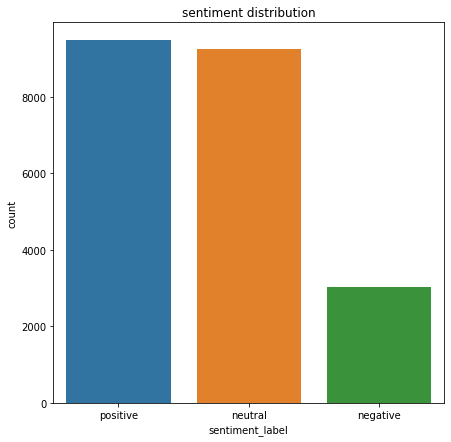

In [307]:
#plot sentiments dist
fig = plt.figure(figsize=(7,7))
plt.title("sentiment distribution")
sns.countplot(x='sentiment_label', data = data);

In [308]:
#table showing sum of sentiments
temp = data.groupby(
    'sentiment_label').count()['Tweet'].reset_index().sort_values(
    by='Tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment_label,Tweet
2,positive,9477
1,neutral,9257
0,negative,3035


There are 9477 positive m-pesa tweets, 9257 neutral and 3035 negative m-pesa sentiment tweets.

In [309]:
#funnel chart of sum of sentiments 
fig = go.Figure(go.Funnelarea(
    text = temp.sentiment_label,
    values = temp.Tweet,
    title = {"position": "top center", "text": '''Funnel-Chart of Twitter
Sentiment Distribution on Mobile Money Service M-Pesa'''}
    ))
fig.show()

Observations;

> Conclusively, from the visualizations above, it is clear that category 0 contains the highest number of tweets which suggests that most tweets are positive sentiments on mobile money m-pesa services at 43.4% . This is closely followed by category 1, tweets which are neutral at 42.6% and taking the last category, 2, are tweets which have negative sentiments on m-pesa services at 14%.



**Investigating the number of characters, words in the tweets.**

**Number of characters in tweet**

We plotted histograms of distributions of number of characters in tweets.

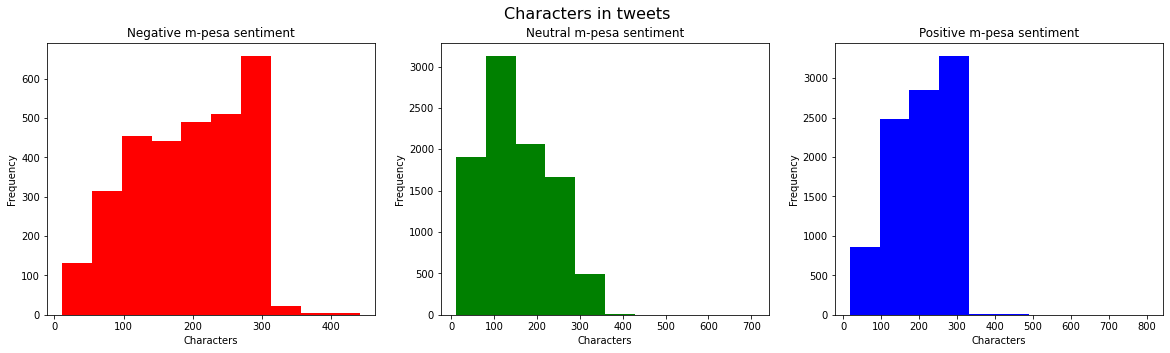

In [310]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sentiments = ['negative', 'neutral', 'positive']
colors = ['red', 'green', 'blue']

for i, sentiment in enumerate(sentiments):
    tweet_len = data[data['sentiment_label']==sentiment]['Tweet'].str.len()
    axes[i].hist(tweet_len, color=colors[i])
    axes[i].set_title(f"{sentiment.capitalize()} m-pesa sentiment")
    axes[i].set_xlabel("Characters")
    axes[i].set_ylabel("Frequency")

fig.suptitle('Characters in tweets', fontsize=16)
plt.show()


Observations:


> From the visualizations above, the characters in a tweet range from 0 to about 420 for negative sentiment, while those of neutral tweets range between 0 to about 450 characters, positive sentiment tweets have about 0 to about 500 characters. In general, most tweets range between 100 and 300 characters across all sentiments.



**Investigating number of words in tweets**

We plotted histograms of distributions of number of words in tweets.

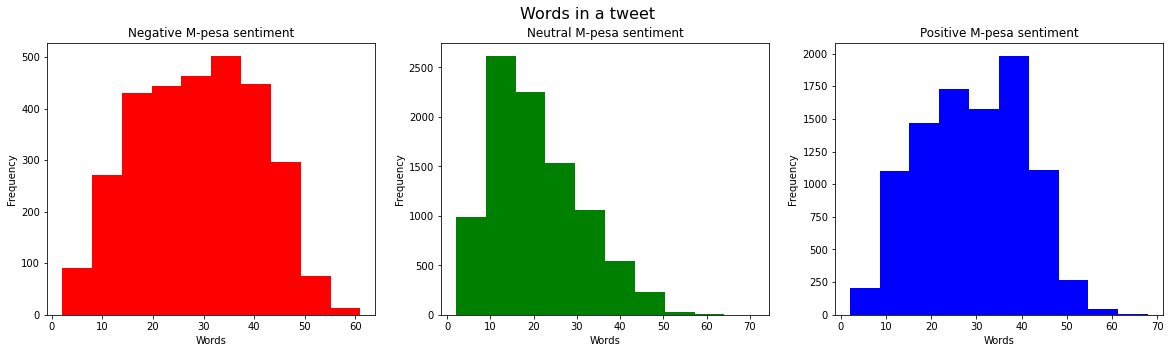

In [311]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sentiments = ['negative', 'neutral', 'positive']
colors = ['red', 'green', 'blue']

for i, sentiment in enumerate(sentiments):
    tweet_len = data[data['sentiment_label']==sentiment]['Tweet'].str.split().map(
        lambda x: len(x))
    axes[i].hist(tweet_len, color=colors[i])
    axes[i].set_title(f"{sentiment.capitalize()} M-pesa sentiment")
    axes[i].set_xlabel("Words")
    axes[i].set_ylabel("Frequency")

fig.suptitle('Words in a tweet', fontsize=16)
plt.show()


Observation:

> From the visualizations above, the words in a tweet range from 0 to about 60 for negative sentiment, while those of neutral tweets range between 0 to about 60 words, positive sentiment tweets have about 0 to about 70 words. In general, most tweets range between 10 and 50 words across all sentiments.



Average word length

We plotted histograms of distribution of average word length in tweets.

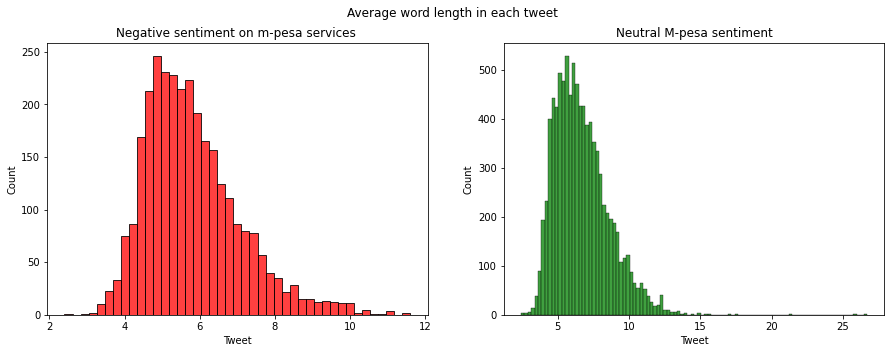

In [312]:
#Average word length
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
word=data[data['sentiment_label']=='negative']['Tweet'].str.split().apply(
    lambda x : [len(i) for i in x]
)
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Negative sentiment on m-pesa services ')
word=data[data['sentiment_label']=='neutral']['Tweet'].str.split().apply(
    lambda x : [len(i) for i in x]
)
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Neutral M-pesa sentiment')
fig.suptitle('Average word length in each tweet');

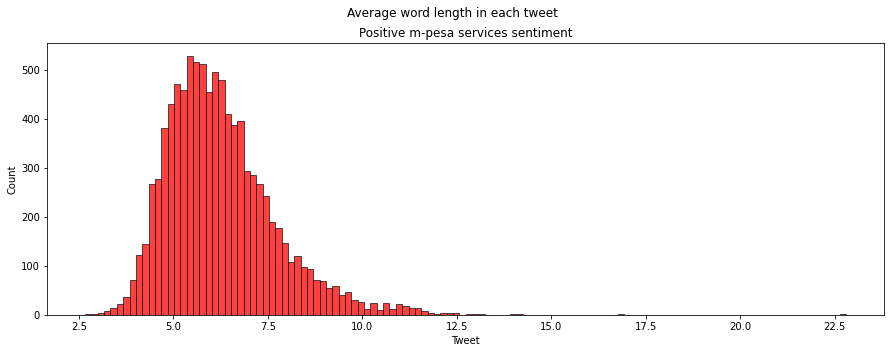

In [313]:
#Average word length
fig,(ax1)=plt.subplots(1,figsize=(15,5))
word=data[data['sentiment_label']=='positive']['Tweet'].str.split().apply(
    lambda x : [len(i) for i in x]
)
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Positive m-pesa services sentiment')
fig.suptitle('Average word length in each tweet');

Observation:

> From the visualizations above, the words in a tweet range from 5 to about 10  characters long on average in general across all sentiments.

**Tweet hashtag summary**

Since Twitter uses Hashtags almost like a summarization feature (at least in the sense of highlighting core ideas). We look at some of top hashtags for each of the classes of sentiment. We'll then make "word clouds" to visualize their prominence.

In [314]:
from IPython.display import (
    Markdown as md,
    Latex,
    HTML,
)
from tqdm.auto import tqdm

Table of top 15 hashtags

In [315]:
#top 15 hashtags
top15 = {}

by_sentiment = data.groupby("sentiment_label")
for sentiment, group in tqdm(by_sentiment):
    hashtags = group["Tweet"].apply(lambda tweet: re.findall(r"#(\w+)", tweet))
    hashtags = itertools.chain(*hashtags)
    hashtags = [ht.lower() for ht in hashtags]
    
    frequency = nltk.FreqDist(hashtags)
    
    df_hashtags = pd.DataFrame({
        "hashtags": list(frequency.keys()),
        "counts": list(frequency.values()),
    })
    top15_htags = df_hashtags.nlargest(15, columns=["counts"])
    
    top15[sentiment] = top15_htags.reset_index(drop=True)

display(pd.concat(top15, axis=1).head(n=15));

  0%|          | 0/3 [00:00<?, ?it/s]

negative                     neutral         \
                 hashtags counts             hashtags counts   
0                   mpesa   2180                mpesa   6502   
1                   kenya    130            safaricom    515   
2               safaricom    126                kenya    488   
3                 nairobi     64              nairobi    268   
4             mobilemoney     60          mobilemoney    232   
5                  africa     42                    m    197   
6                  fuliza     41              fintech    195   
7                    ruto     41                 ruto    182   
8                 fintech     38               africa    174   
9                       m     34            ikokazike    121   
10    masculinitysaturday     30     mainaandkingangi    106   
11  waigurumedicalcomplex     29                raila    103   
12                kalonzo     29             tanzania    102   
13                covid19     26  masculinitysaturday     96   
14                  sonko     24              covid19     93   

               positive         
               hashtags counts  
0                 mpesa   7333  
1                 kenya    528  
2             safaricom    519  
3           mobilemoney    275  
4               fintech    265  
5               nairobi    252  
6                africa    206  
7                     m    200  
8                  ruto    141  
9   masculinitysaturday    126  
10             tanzania    119  
11      domorewithmpesa    105  
12              covid19    105  
13     safaricomopenday    103  
14            ikokazike     86

Visualizing the frequency of hashtags in barplots for each sentiment categorization

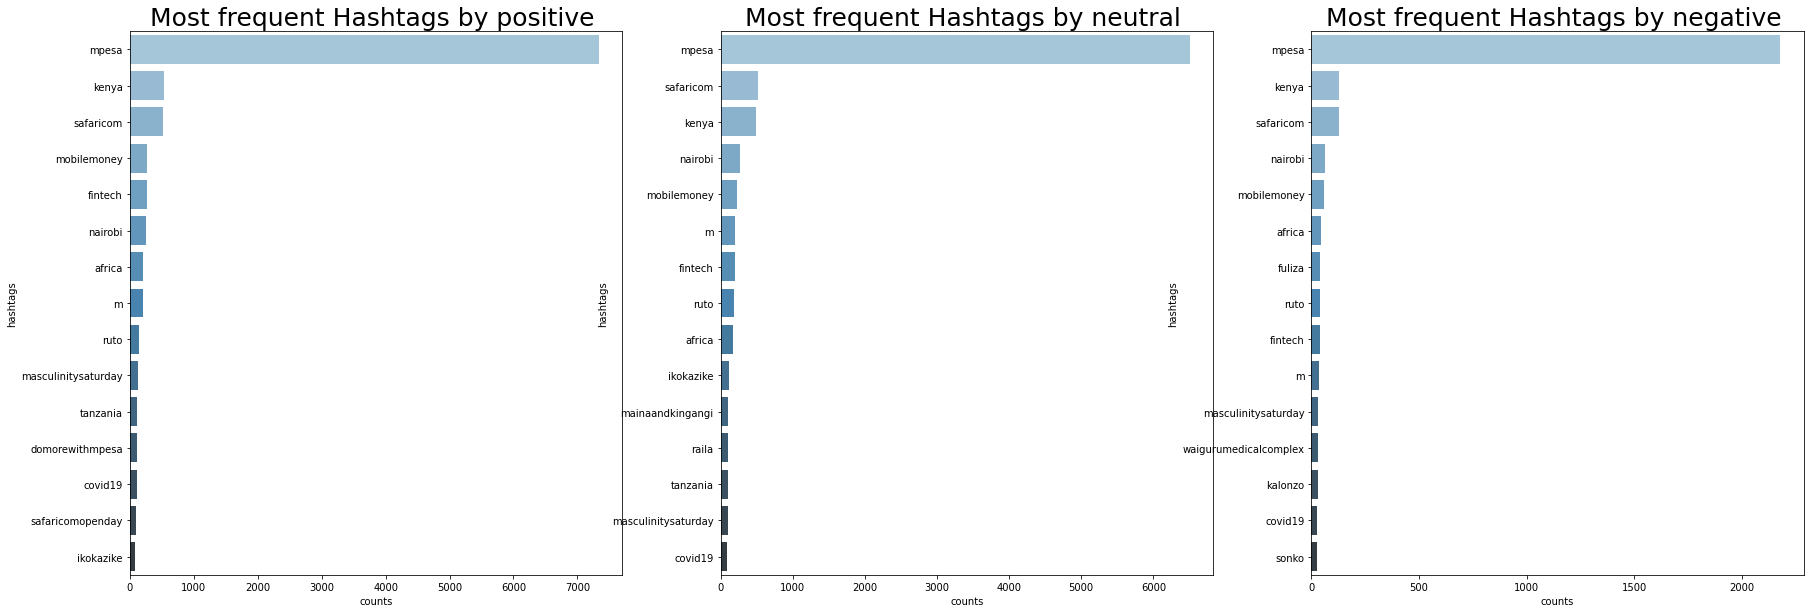

In [316]:
sentiments = ["positive", "neutral", "negative"]
# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Iterate over the sentiments and plot the top 15 hashtags for each sentiment 
#in a separate subplot
for i, sentiment in enumerate(sentiments):
    top = top15[sentiment]
    sns.barplot(data=top, y="hashtags", x="counts", palette="Blues_d",
                ax=axes[i])
    axes[i].set_title(f"Most frequent Hashtags by {sentiment} ", fontsize=25)

# Show the plot
plt.show()

Observations:

> The most popular hashtags are, broadly, mpesa, safaricom and Kenya. Which is expected, given the topic; but also, among the top 10 is a hashtag relating to Ruto probably his 2022 presidential campaign .

> The fuliza hashtag refers to a 2019 overdraft service that m-pesa launched on it's mobile money wallet in conjuction with NCBA bank. Here it features quite frequently on the negative sentiment tweets. 

> Africa featuring in all the sentiments categories shows that m-pesa is indeed popular in the continent. Tanzania particularly in positive and neutral sentiment categories shows that m-pesa enjoys popular appeal and after kenya that might be the next largest market for m-pesa.


> Interestingly, covid19 made the shortlist of the positive sentiment. This is likely attributed to m-pesa to bank  transaction charges/fees being removed during the pandemic period.



# 6) Final Tweet Data Cleaning and Pre-processing.

In [317]:
#Data pre-processing
#Glance at data
data['Tweet'][:20]

0     The best that happened in Kenya is #Mpesa. \nE...
1     The CS\n#Safaricom\n#Mpesa\nNjugush\nYaya\nPre...
2     Here we enjoy the Sweet &amp; Sour nature of l...
3     But since its from Mpesa and I sent the revers...
4     Congratulations to the Central Bank of Kenya o...
5     You save and invest every time you use Sidooh ...
6     Start booking now.\n\n +254757139239\n\nDon't ...
7     https://t.co/NP37njHTCv = "You wanna stay in t...
8     #Timiza, the #NeoBank by Absa Bank Kenya, cont...
9     With love for love!                           ...
10    Surprise your loved ones today with \nKitchen ...
11    You're misled if you think so that anyone has ...
12    Let's mingle..... furahiday\n#TurkeyEarthquake...
13    𝙂𝙚𝙩 𝙩𝙝𝙚 𝙖𝙛𝙛𝙤𝙧𝙙𝙖𝙗𝙡𝙚 𝙩𝙧𝙖𝙫𝙚𝙡 𝙥𝙖𝙘𝙠𝙖𝙜𝙚𝙨 𝙛𝙤𝙧 𝙅𝙤𝙝𝙖𝙣𝙣𝙚...
14    Business Directory for Companies and Organisat...
15    💰💰 PRICE KES  3,7500,000\n☎️📞 CALL/WHATSAPP 07...
16    Isn't this lovely?Won't it look good on you th...
17    Comedian Eric Omondi controversial message

Defining the cleaning function to remove specified elements from the tweet message.

In [318]:
#Define a function

import re

def text_cleaning(message):
  
    message = message.lower()                           #Lowercase
    message = re.sub(r'http\S+|www\.\S+|https\S+', '', message, 
                     flags=re.MULTILINE) #Removing the hyperlink/urls
    message = re.sub(r'\@\w+|\#','', message)     # removing @mentions and #
    message = re.sub(r'rt[\s]+', '', message)           # removing RT
    message = re.sub(r'&[a-z;]+', '', message)          # removing '>'
    message = re.sub('[^a-zA-Z]', ' ', message)         #removing punctuation

    return message

In [319]:
# applying the text cleaning function on tweets
data['Tweet'] = data['Tweet'].apply(text_cleaning)
data.head(100)

,Tweet,sentiment,sentiment_label
0,the best that happened in kenya is mpesa eve...,0.750000,positive
1,the cs safaricom mpesa njugush yaya president ...,0.000000,neutral
2,here we enjoy the sweet sour nature of life a...,0.346875,positive
3,but since its from mpesa and i sent the revers...,-0.200000,negative
4,congratulations to the central bank of kenya o...,0.150000,positive
...,...,...,...
95,worldsportsbetting k jackpot predictions sun...,0.000000,neutral
96,sitaki negative energy song now out on youtu...,-0.375000,negative
97,sitaki negative energy song now out on youtu...,-0.375000,negative
98,when u shake hands with a mad man he will soo...,-0.625000,negative


Lemmatization and removing stopwords.

Downloading requisite packages for the nltk library.



In [320]:
#Downloading requisite packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [321]:
#import libraries
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet 

Creating a lemmatizing function combined with a stopword identifier

In [322]:
#lemmatizing function combined with a stopword identifier
def lemmatizer(data):
    data["length"] = data["Tweet"].str.len()
    data["tokenized"] = data["Tweet"].apply(word_tokenize)
    data["parts-of-speech"] = data["tokenized"].apply(nltk.tag.pos_tag)
    
    def str2wordnet(tag):
        conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, 
                      "R": wordnet.ADV}
        try:
            return conversion[tag[0].upper()]
        except KeyError:
            return wordnet.NOUN
    
    wnl = WordNetLemmatizer()
    data["parts-of-speech"] = data["parts-of-speech"].apply(
        lambda tokens: [(word, str2wordnet(tag)) for word, tag in tokens]
    )
    data["lemmatized"] = data["parts-of-speech"].apply(
        lambda tokens: [wnl.lemmatize(word, tag) for word, tag in tokens]
    )
    data["lemmatized"] = data["lemmatized"].apply(lambda tokens: " ".join(map(str, tokens)))
    
    return data

Applying the lemmatizer function to our dataset and previewing the changes.

In [323]:
#applying the lemmatizer function
data = lemmatizer(data)
data.head()

,Tweet,sentiment,sentiment_label,length,tokenized,parts-of-speech,lemmatized
0,the best that happened in kenya is mpesa eve...,0.750000,positive,139,"[the, best, that, happened, in, kenya, is, mpe...","[(the, n), (best, a), (that, n), (happened, v)...",the best that happen in kenya be mpesa even th...
1,the cs safaricom mpesa njugush yaya president ...,0.000000,neutral,141,"[the, cs, safaricom, mpesa, njugush, yaya, pre...","[(the, n), (cs, n), (safaricom, n), (mpesa, n)...",the c safaricom mpesa njugush yaya president w...
2,here we enjoy the sweet sour nature of life a...,0.346875,positive,212,"[here, we, enjoy, the, sweet, sour, nature, of...","[(here, r), (we, n), (enjoy, v), (the, n), (sw...",here we enjoy the sweet sour nature of life an...
3,but since its from mpesa and i sent the revers...,-0.200000,negative,255,"[but, since, its, from, mpesa, and, i, sent, t...","[(but, n), (since, n), (its, n), (from, n), (m...",but since it from mpesa and i send the reversa...
4,congratulations to the central bank of kenya o...,0.150000,positive,249,"[congratulations, to, the, central, bank, of, ...","[(congratulations, n), (to, n), (the, n), (cen...",congratulation to the central bank of kenya on...


Visualizing the average length of tweeets after some transformation as above

We plotted boxplots of average tweet lengths.

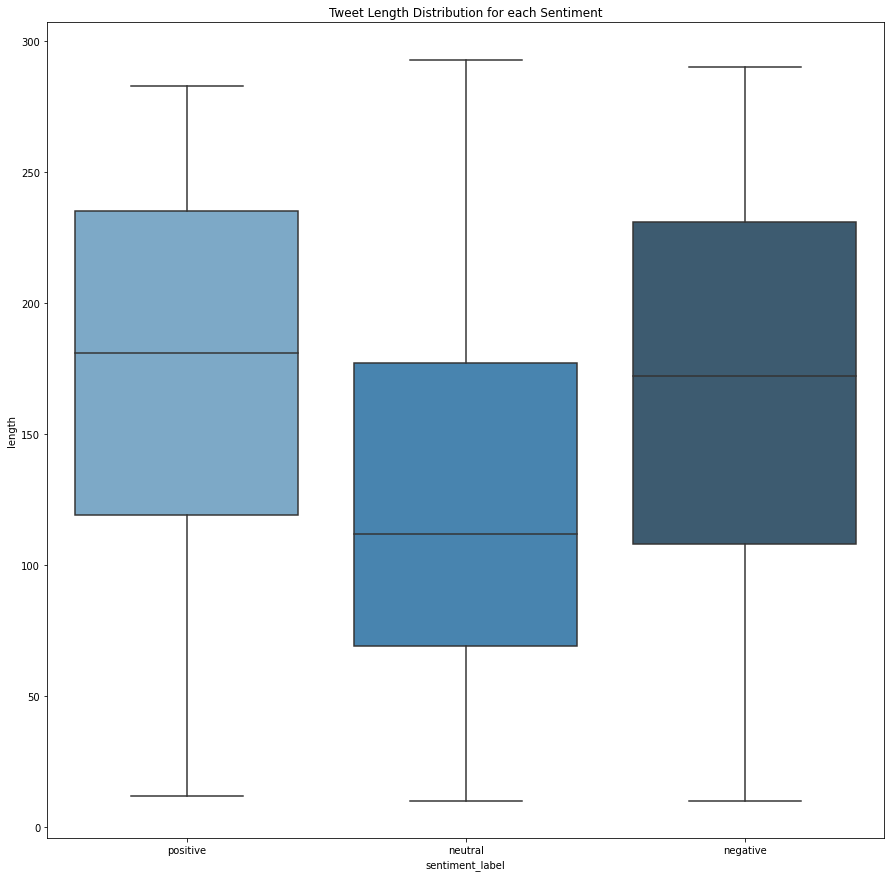

In [324]:
#boxplot for visualizing the average length of tweets
plt.figure(figsize=(15, 15))
sns.boxplot(x="sentiment_label", y="length", data=data, palette="Blues_d")
plt.title("Tweet Length Distribution for each Sentiment")
plt.show()

Observations:

>  From the visualization above, it is evident that most tweets range from 50 to 250 characters while some are in excess of 250 characters.Other tweets are observed to be very short, essentially less than 50 characters

**Identifying the frequent words/Buzzwords**

In [325]:
#import libraries
from sklearn.feature_extraction.text import CountVectorizer

Calculating the frequency of words for each sentiment

In [326]:
#Calculating the frequency of words for each sentiment
frequency = {}

by_sentiment = data.groupby("sentiment_label")
for sentiment, group in tqdm(by_sentiment):
    cv = CountVectorizer(stop_words="english")
    words = cv.fit_transform(group["Tweet"])
    
    n_words = words.sum(axis=0)
    word_freq = [(word, n_words[0, idx]) for word,
                 idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    
    freq = pd.DataFrame(word_freq, columns=["word", "freq"])
    
    frequency[sentiment] = freq.head(n=25)

to_view = pd.concat(frequency, axis=1).head(n=25)
display(to_view);

  0%|          | 0/3 [00:00<?, ?it/s]

negative          neutral         positive      
           word  freq       word  freq       word  freq
0         mpesa  2385      mpesa  6996      mpesa  7988
1          pesa  1125       pesa  3438       pesa  2900
2         money   440      kenya  1089      kenya  1307
3     safaricom   338  safaricom   972  safaricom  1187
4         kenya   319      money   881      money  1078
5        number   228    account   507        new   753
6           pay   211     number   502     mobile   638
7          send   202        pay   463    nairobi   632
8          just   193    nairobi   456     kindly   534
9         wrong   192     mobile   429        ksh   516
10          ksh   188       ruto   378      today   514
11       mobile   173     africa   348       free   510
12         like   165       send   316     africa   509
13      nairobi   147   business   312        app   503
14         time   147        app   311       good   487
15      airtime   142       just   299        pay   459
16          day   141        buy   279       just   448
17      service   140      today   276       like   434
18      account   133        ksh   275    account   433
19       people   131   payments   269        day   419
20  transaction   129   services   265   services   393
21          buy   127       like   264   business   390
22          don   119         na   264        buy   389
23      kenyans   112    airtime   260       time   380
24       africa   111       bank   255     number   377

Building a wordcloud visualizer for each word frequency in the sentiments.

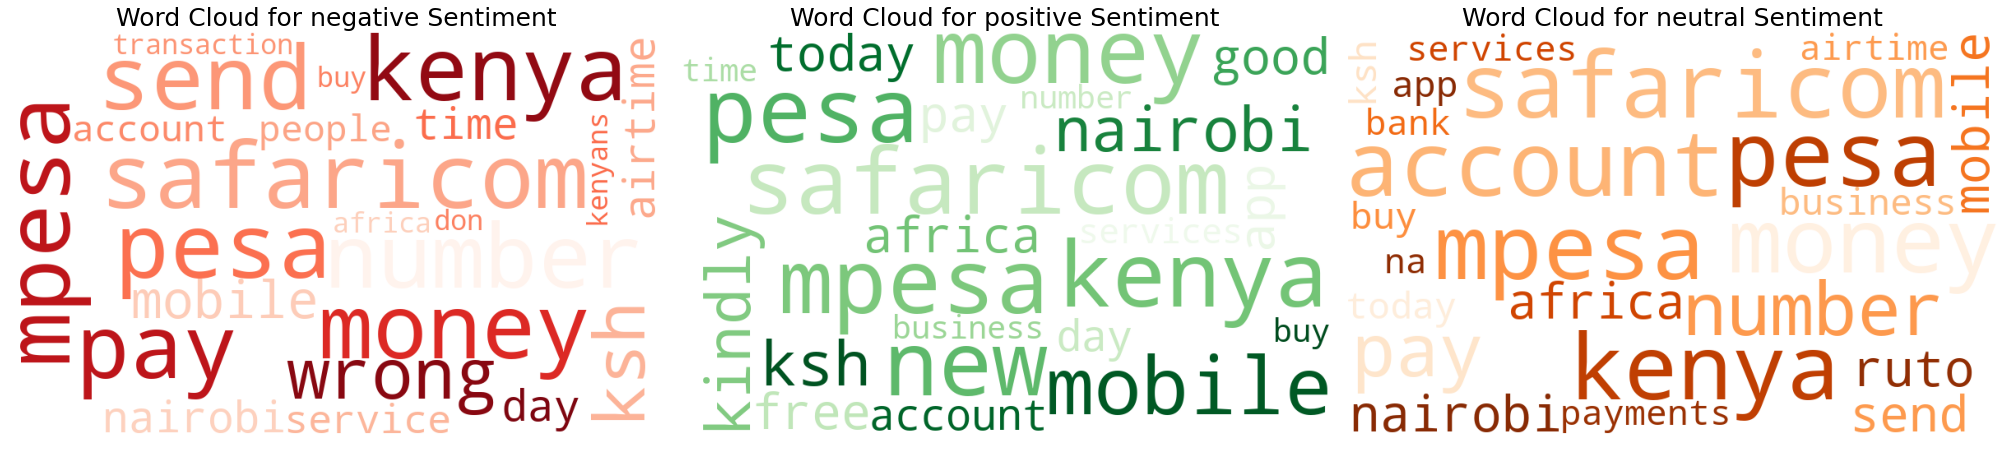

In [327]:
words = {'neutral': " ".join(frequency['neutral']["word"].values), 
         'negative': " ".join(frequency['negative']["word"].values), 
         'positive': " ".join(frequency['positive']["word"].values)}
cmaps = {'negative': ("Reds", 110), 'positive': ("Greens", 73), 'neutral': ("Oranges", 10)}

from wordcloud import WordCloud

wordclouds = {}
for sentiment, (cmap, rand) in cmaps.items():
    wordclouds[sentiment] = WordCloud(width=800, height=500, random_state=rand,
                                      max_font_size=110, 
                                      background_color="white",
                                      colormap=cmap).generate(words[sentiment])

fig, axes = plt.subplots(1, 3, figsize=(28, 10)) # Set 1 row and 3 columns for the subplots
counter = 0

for sentiment, wordcloud in wordclouds.items():
    axes[counter].imshow(wordcloud)
    axes[counter].set_title(f"Word Cloud for {sentiment} Sentiment", fontsize=25) # Set the title for each subplot
    axes[counter].axis("off") # Turn off the axis
    counter += 1
    
plt.tight_layout() # Adjust the layout
plt.show()


Observations:

> The top 4 buzzwords are mpesa, pesa, kenya and safaricom . This seems to indicate that a lot of the same information is being shared/viewed – this applies across all sentiments. While we can't conclude that's a result of the "filter bubble", it certainly seems like that might be a latent (hidden) cause.

> Interestingly, 'ruto' occurs in the neutral sentiment. This may not be surprising given his political activity during the timeframe the tweets were scraped – this is something that likely warrants further investigation especially along this axis of Neutral.

> The word 'wrong' occurs quite frequently in the negative sentiment. This might be attributed to tweets where users tweeted about wrong number transactions which are obviously annoying hence the negativity of the sentiment.

> Take a look at the table above, you'll see that 'free' actually shows up in the positive sentiment quite frequently. This would imply that customers tweeted quite frequently about their satisfaction with the free transactions during the pandemic.

In [329]:
#preview the dataframe
data

,Tweet,sentiment,sentiment_label,length,tokenized,parts-of-speech,lemmatized
0,the best that happened in kenya is mpesa eve...,0.750000,positive,139,"[the, best, that, happened, in, kenya, is, mpe...","[(the, n), (best, a), (that, n), (happened, v)...",the best that happen in kenya be mpesa even th...
1,the cs safaricom mpesa njugush yaya president ...,0.000000,neutral,141,"[the, cs, safaricom, mpesa, njugush, yaya, pre...","[(the, n), (cs, n), (safaricom, n), (mpesa, n)...",the c safaricom mpesa njugush yaya president w...
2,here we enjoy the sweet sour nature of life a...,0.346875,positive,212,"[here, we, enjoy, the, sweet, sour, nature, of...","[(here, r), (we, n), (enjoy, v), (the, n), (sw...",here we enjoy the sweet sour nature of life an...
3,but since its from mpesa and i sent the revers...,-0.200000,negative,255,"[but, since, its, from, mpesa, and, i, sent, t...","[(but, n), (since, n), (its, n), (from, n), (m...",but since it from mpesa and i send the reversa...
4,congratulations to the central bank of kenya o...,0.150000,positive,249,"[congratulations, to, the, central, bank, of, ...","[(congratulations, n), (to, n), (the, n), (cen...",congratulation to the central bank of kenya on...
...,...,...,...,...,...,...,...
21766,review your rates failure to the only servi...,-0.062500,negative,126,"[review, your, rates, failure, to, the, only, ...","[(review, v), (your, n), (rates, n), (failure,...",review your rate failure to the only service y...
21767,well come to safaricom where checking your ...,0.450000,positive,99,"[well, come, to, safaricom, where, checking, y...","[(well, r), (come, v), (to, n), (safaricom, v)...",well come to safaricom where check your m pesa...
21768,good afternoon i wanted to know if you coul...,0.700000,positive,92,"[good, afternoon, i, wanted, to, know, if, you...","[(good, a), (afternoon, n), (i, n), (wanted, v...",good afternoon i want to know if you could lin...
21769,slay queens ends their posts by saying follow...,0.000000,neutral,132,"[slay, queens, ends, their, posts, by, saying,...","[(slay, n), (queens, n), (ends, v), (their, n)...",slay queen end their post by say follow me on ...


In [330]:
# sentiment column back to number representation
sentiment_name2num = {
     "neutral": 0,
     "negative": 1,
     "positive" :2,
}
data["sentiment_label"] = data["sentiment_label"].apply(
    lambda num: sentiment_name2num[num]
)
data.head()

,Tweet,sentiment,sentiment_label,length,tokenized,parts-of-speech,lemmatized
0,the best that happened in kenya is mpesa eve...,0.750000,2,139,"[the, best, that, happened, in, kenya, is, mpe...","[(the, n), (best, a), (that, n), (happened, v)...",the best that happen in kenya be mpesa even th...
1,the cs safaricom mpesa njugush yaya president ...,0.000000,0,141,"[the, cs, safaricom, mpesa, njugush, yaya, pre...","[(the, n), (cs, n), (safaricom, n), (mpesa, n)...",the c safaricom mpesa njugush yaya president w...
2,here we enjoy the sweet sour nature of life a...,0.346875,2,212,"[here, we, enjoy, the, sweet, sour, nature, of...","[(here, r), (we, n), (enjoy, v), (the, n), (sw...",here we enjoy the sweet sour nature of life an...
3,but since its from mpesa and i sent the revers...,-0.200000,1,255,"[but, since, its, from, mpesa, and, i, sent, t...","[(but, n), (since, n), (its, n), (from, n), (m...",but since it from mpesa and i send the reversa...
4,congratulations to the central bank of kenya o...,0.150000,2,249,"[congratulations, to, the, central, bank, of, ...","[(congratulations, n), (to, n), (the, n), (cen...",congratulation to the central bank of kenya on...


# 7) Implementing the Solution using LSTM




In [331]:
# Importing the relevant libraries
import tensorflow as tf
import keras.preprocessing.sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = data['lemmatized']
y = data['sentiment_label']

In [332]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data['lemmatized'], y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

#save the tokenizer for use later in model deployment.
# Save the tokenizer to file
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(tokenizer.to_json())


# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
print('Training sequence: ', X_train_seq[0])
print('Testing sequence: ', X_test_seq[0])

Training sequence:  [1039, 285, 32, 6, 2201, 230, 12, 190, 560, 640, 811, 12447, 12448, 1, 2865, 2866]
Testing sequence:  [3, 1282, 12, 53, 123, 12, 27, 9, 5935, 14, 933, 4, 1142, 3, 470, 6, 17, 14, 1142, 3, 470, 9, 23, 78, 3, 39, 12, 1, 21, 37, 90, 115, 67, 6, 608, 12, 1843, 344, 26, 90, 18, 3, 541, 83, 860]


In [333]:
# Get the vocabulary size
vocabulary_size = len(tokenizer.word_index) + 1
print('The size of data set vocab is: ', vocabulary_size)


The size of data set vocab is:  26696


In [334]:

# Pad the sequences to the same length
max_tweet_length = max([len(seq) for seq in X_train_seq + X_test_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_tweet_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_tweet_length)
print('The length of training sequence is: ', X_train_pad.shape[1])
print('The length of testing sequence is: ', X_test_pad.shape[1])

The length of training sequence is:  61
The length of testing sequence is:  61


In [335]:
# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(vocabulary_size, 122, 
                         input_length=X_train_pad.shape[1]))
lstm_model.add(SpatialDropout1D(0.4))
lstm_model.add(LSTM(244, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
                   metrics=['accuracy'])
print(lstm_model.summary())


print('---------------------------------------------------------------------')


# Convert inputs to numpy arrays
X_train_pad = np.array(X_train_pad)
y_train = np.array(y_train)
X_test_pad = np.array(X_test_pad)
y_test = np.array(y_test)

# Fit the model
history = lstm_model.fit(X_train_pad, y_train, epochs=10, batch_size=30, 
                         validation_data=(X_test_pad, y_test))

# Use the LSTM model to make predictions on the test set
lstm_pred = np.argmax(lstm_model.predict(X_test_pad), axis=1)

# Evaluate the performance
from sklearn.metrics import classification_report,confusion_matrix


print('---------------------------------------------------------------------')


# Print a classification report and confusion matrix

print(classification_report(y_test, lstm_pred))
print('---------------------------------------------------------------------')
print(confusion_matrix(y_test, lstm_pred))



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 61, 122)           3256912   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 61, 122)          0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 244)               358192    
                                                                 
 dense_3 (Dense)             (None, 3)                 735       
                                                                 
Total params: 3,615,839
Trainable params: 3,615,839
Non-trainable params: 0
_________________________________________________________________
None
---------------------------------------------------------------------
Epoch 1/10
581/581 [===============

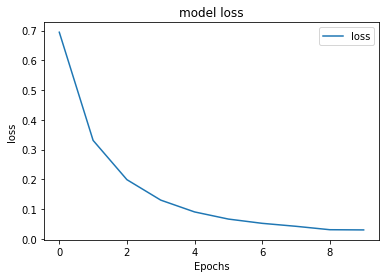

In [336]:
# plotting the loss of the model
plt.plot(history.history['loss'], label='loss')
plt.title("model loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend();

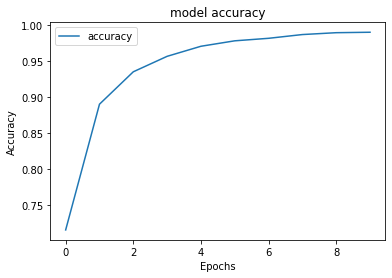

In [337]:
# plotting the accuracy of the model
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.title("model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();


The model has 86% accuracy at 10 epochs.

In [338]:
# Reviewing the Solution using XGBoost
import xgboost as xgb

# Convert inputs to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_pad, label=y_train)
dtest = xgb.DMatrix(X_test_pad, label=y_test)

# Define XGBoost model parameters
params = {'objective': 'multi:softmax', 'num_class': 3, 'max_depth': 6,
          'eta': 0.3, 'subsample': 0.6, 'colsample_bytree': 0.8}

# Train the XGBoost model
num_rounds = 50
xgb_model = xgb.train(params, dtrain, num_rounds)

# Use the XGBoost model to make predictions on the test set
xgb_pred = xgb_model.predict(dtest)

# Evaluate the performance
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix = confusion_matrix(y_test, xgb_pred)
print(confusion_matrix)
print('---------------------------------------------------------------------')
print(classification_report(y_test, xgb_pred))
print('Accuracy of our model is' + ' ' + str(accuracy_score(y_test, xgb_pred)))

[[1358   11  549]
 [ 204   45  346]
 [ 561   30 1250]]
---------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1918
           1       0.52      0.08      0.13       595
           2       0.58      0.68      0.63      1841

    accuracy                           0.61      4354
   macro avg       0.58      0.49      0.48      4354
weighted avg       0.60      0.61      0.58      4354

Accuracy of our model is 0.6093247588424437


 **Observation** :
> LSTM has given us a better perfomance compared to XGBoost. We are going to precced with LSTM to deployment

#8) Deployment

Save the trained LSTM model to an h5 file:

In [339]:
# Save the trained LSTM model as an H5 file in the current working directory
from tensorflow.keras.models import Model
import json
from keras.models import load_model
from keras.preprocessing.text import tokenizer_from_json
from nltk.corpus import stopwords
# `model` is the trained LSTM model
lstm_model.save('model.h5')


Pre-processing the input text before deployment testing.

In [340]:
#deployment pre-processing
from nltk.corpus import wordnet

def str2wordnet(tag):
    conversion = {"J": wordnet.ADJ, "V": wordnet.VERB, "N": wordnet.NOUN, 
                  "R": wordnet.ADV}
    try:
        return conversion[tag[0].upper()]
    except KeyError:
        return wordnet.NOUN
        
# Load the tokenizer from file
with open('tokenizer.json') as f:
    data1 = f.read()
    tokenizer = tokenizer_from_json(data1)

# Define the lemmatizing function
def lemmatizer(text):
    wnl = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Tokenize the input text
    tokens = word_tokenize(text.lower())

    # Remove stopwords and lemmatize the remaining words
    lemmas = [wnl.lemmatize(word, pos=str2wordnet(pos)) for word, 
              pos in nltk.pos_tag(tokens) if word not in stop_words]

    # Combine the lemmatized words back into a single string
    lemmatized_text = " ".join(lemmas)

    return lemmatized_text

# Define the sentiment prediction function
def predict_sentiment(input_text):
    # Load the saved model
    model = tf.keras.models.load_model('model.h5')

    # Preprocess the input text
    input_text = lemmatizer(input_text)
    input_seq = tokenizer.texts_to_sequences([input_text])
    input_pad = pad_sequences(input_seq, maxlen=max_tweet_length, 
                              padding='post', truncating='post')

    # Make a prediction with the model
    prediction = model.predict(input_pad)

    # Define the mapping of labels to sentiment names
    labels = {
        0: "neutral",
        1: "negative",
        2: "positive"
    }

    # Convert the prediction to a label
    predicted_label = labels[np.argmax(prediction)]

    # Return the predicted sentiment label
    return predicted_label

Testing deployment.

In [341]:
#deploying
input_text = '''M-Pesa is a mobile money service that was first launched in 
Kenya in 2007 and it allows users to store and transfer money, pay bills, 
and purchase goods and services using their mobile phones.'''
predicted_sentiment = predict_sentiment(input_text)
print("Input text:", input_text)
print("Predicted sentiment:", predicted_sentiment)

1/1 [==============================] - 0s 293ms/step
Input text: M-Pesa is a mobile money service that was first launched in 
Kenya in 2007 and it allows users to store and transfer money, pay bills, 
and purchase goods and services using their mobile phones.
Predicted sentiment: neutral


Save requirements file

In [344]:
#create requirements file
!pip freeze > requirements.txt

# 9) Conclusions.

* Most tweets are positive sentiments on mobile money m-pesa services at 43.4%, closely followed by tweets which are neutral at 42.6% and the last are tweets which have negative sentiments on m-pesa services at 14%.

* COVID-19 had a positive impact on M-Pesa transactions due to the removal of transaction fees during the pandemic.

*  M-Pesa is a popular mobile money wallet in Kenya and Tanzania, and it has a positive sentiment among users in those countries.

* The most popular hashtags related to M-Pesa are mpesa, safaricom  and Kenya.

* Users tweet frequently about the Fuliza overdraft service, and it features quite negatively though popular.

* Users tweet frequently about the transactions that ended up in money being sent to wrong numbers and these tweets are mainly negative sentiment-wise.

# 10) Recommendations.
* M-Pesa could leverage the positive impact of COVID-19 on its public image by  the removal or reduction of transaction fees which attracted positive public sentiment during the pandemic.

* Since the Fuliza overdraft service is frequently mentioned in negative sentiment tweets, M-Pesa and NCBA bank could work on improving the service to increase customer satisfaction. 

* Further investigation could be conducted on the relationship between Ruto and neutral sentiment tweets to gain a deeper understanding of the role of politics in customer sentiment towards M-Pesa though we suspect it was spam.

* M-Pesa could analyze tweets related to "wrong" number transactions and work on improving the user experience to reduce negative sentiment. This can be done by ensuring the users can verify the correct number to transact with and facilitating easier reversal of erroneous transactions for better user satisfaction.

* Safaricom could leverage the positive and neutral sentiment in Tanzania to market M-pesa more and expand its reach in the market which is larger than Kenya demographically and therefore has more potential.
